
Dataset Shape: (2920, 10)

Missing Values:
 distance_to_solar_noon       0
temperature                  0
wind_direction               0
wind_speed                   0
sky_cover                    0
visibility                   0
humidity                     0
average_wind_speed_period    1
average_pressure_period      0
power_generated              0
dtype: int64

Data Types:
 distance_to_solar_noon       float64
temperature                    int64
wind_direction                 int64
wind_speed                   float64
sky_cover                      int64
visibility                   float64
humidity                       int64
average_wind_speed_period    float64
average_pressure_period      float64
power_generated                int64
dtype: object

Summary Statistics:
        distance_to_solar_noon  temperature  wind_direction   wind_speed  \
count             2920.000000  2920.000000     2920.000000  2920.000000   
mean                 0.503294    58.468493       24.953425    

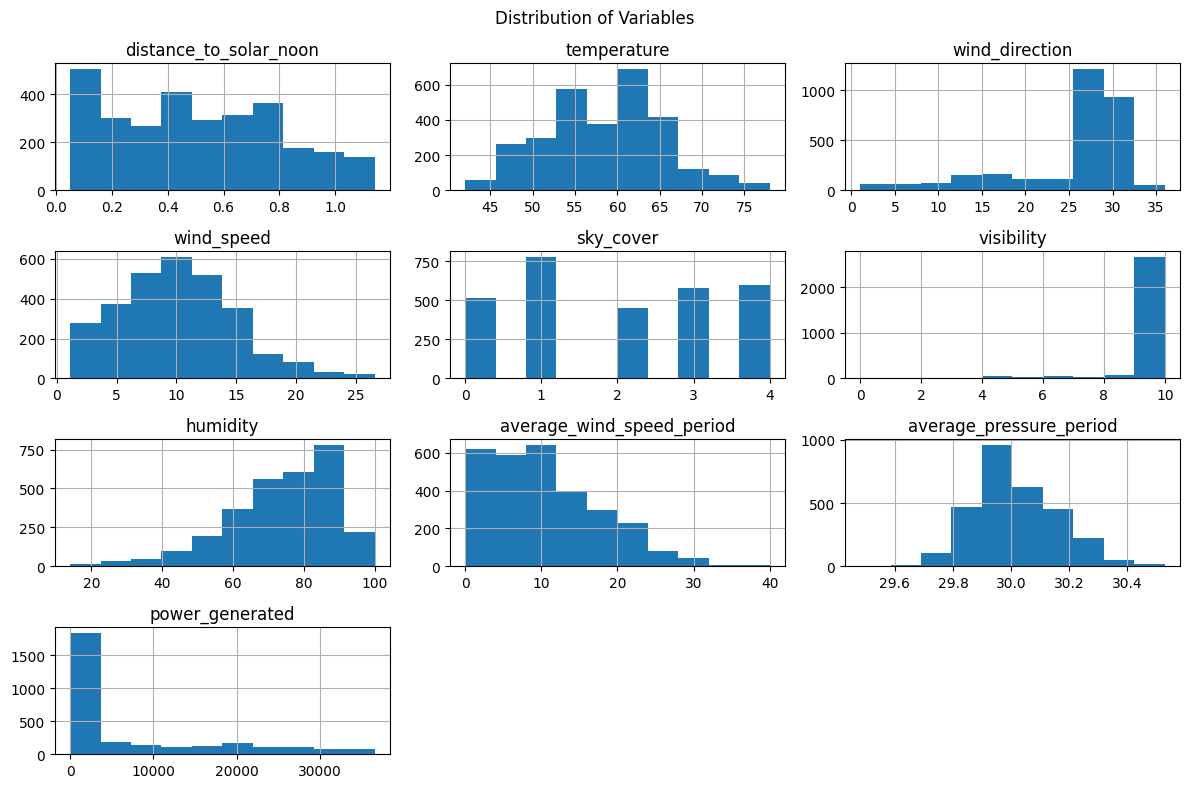

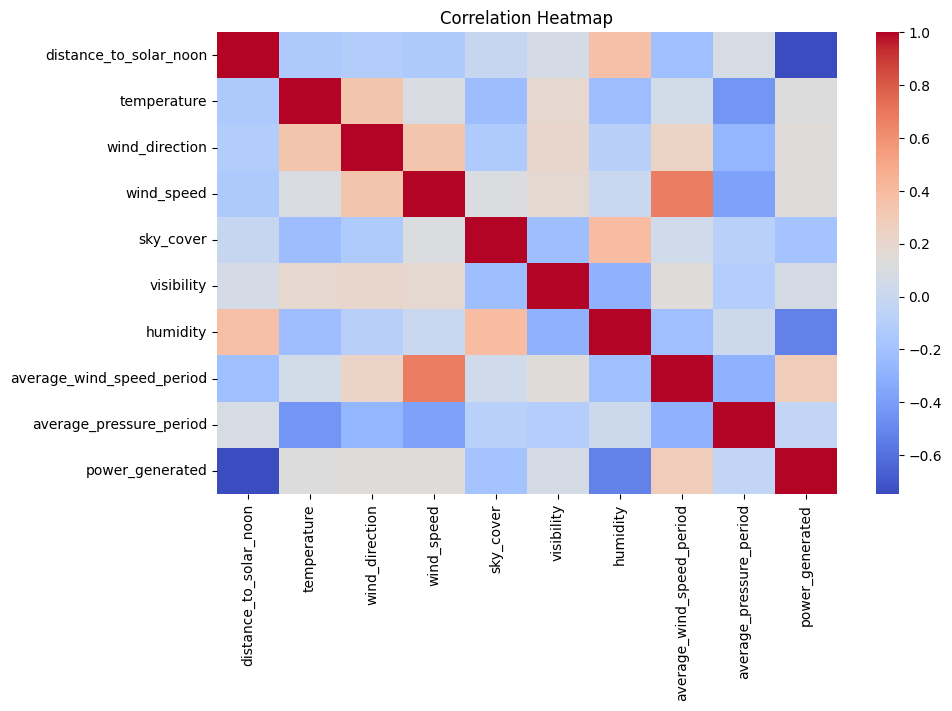


MODEL PERFORMANCE COMPARISON:

Linear Regression:  R2=0.6251,  MAE=4981.1543,  RMSE=6284.4996
Decision Tree:  R2=0.8129,  MAE=1999.2568,  RMSE=4439.8508
Random Forest:  R2=0.8898,  MAE=1548.6460,  RMSE=3407.5921
Gradient Boosting:  R2=0.9010,  MAE=1677.6016,  RMSE=3228.9077

Best Model Based on R²: Gradient Boosting


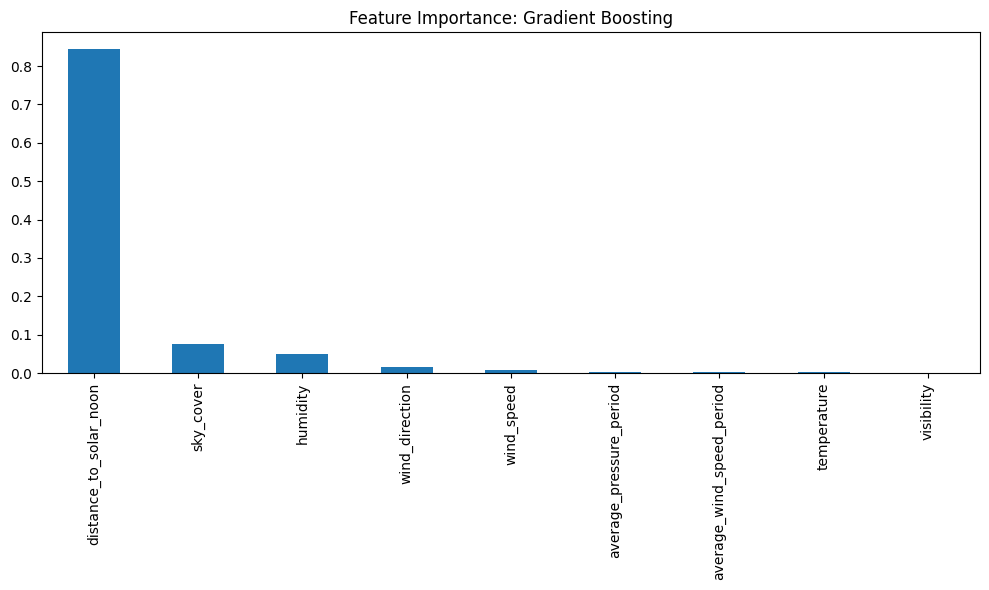

In [13]:
# -----------------------------
# IMPORT LIBRARIES
# -----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns

# -----------------------------
# LOAD DATASET
# -----------------------------
file_path = "/content/solarpowergeneration (1).xlsx"
df = pd.read_excel(file_path)

# Clean column names
df.columns = df.columns.str.replace('-', '_').str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

print("\nDataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())

# Fill missing with median
df = df.fillna(df.median())

# -----------------------------
# BASIC EDA
# -----------------------------
print("\nData Types:\n", df.dtypes)
print("\nSummary Statistics:\n", df.describe())

# Histograms
df.hist(figsize=(12, 8))
plt.suptitle("Distribution of Variables")
plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# MODEL BUILDING
# -----------------------------
target = "power_generated"
X = df.drop(columns=[target])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

results = {}

# TRAIN MODELS
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    r2 = r2_score(y_test, preds)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))

    results[name] = {"R2": r2, "MAE": mae, "RMSE": rmse}

# -----------------------------
# RESULTS
# -----------------------------
print("\nMODEL PERFORMANCE COMPARISON:\n")
for name, metrics in results.items():
    print(f"{name}:  R2={metrics['R2']:.4f},  MAE={metrics['MAE']:.4f},  RMSE={metrics['RMSE']:.4f}")

# -----------------------------
# SELECT BEST MODEL
# -----------------------------
# Best model = highest R2 & lowest RMSE
best_model_name = max(results, key=lambda x: results[x]["R2"])
best_model = models[best_model_name]

print("\nBest Model Based on R²:", best_model_name)

# -----------------------------
# FEATURE IMPORTANCE (for tree models)
# -----------------------------
if hasattr(best_model, "feature_importances_"):
    importance = pd.Series(best_model.feature_importances_, index=X.columns)
    importance = importance.sort_values(ascending=False)

    plt.figure(figsize=(10, 6))
    importance.plot(kind='bar')
    plt.title(f"Feature Importance: {best_model_name}")
    plt.tight_layout()
    plt.show()
else:
    print("\nFeature importance not available for this model.")